<table align="left" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21618C" size=8px>
                  <b>Mobile Price Classification
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' features various classification, regression and clustering algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 'Statsmodels' is used to explore data, estimate statistical models, and perform statistical tests
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

## 2. Read Data

In [2]:
df = pd.read_csv('train.csv')
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
battery_power,842.0,1021.0,563.0,615.0,1821.0,1859.0,1821.0,1954.0,1445.0,509.0
blue,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2,0.5,1.7,0.5,0.5,0.6
dual_sim,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
fc,1.0,0.0,2.0,0.0,13.0,3.0,4.0,0.0,0.0,2.0
four_g,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0,22.0,10.0,24.0,53.0,9.0
m_dep,0.6,0.7,0.9,0.8,0.6,0.7,0.8,0.8,0.7,0.1
mobile_wt,188.0,136.0,145.0,131.0,141.0,164.0,139.0,187.0,174.0,93.0
n_cores,2.0,3.0,5.0,6.0,2.0,1.0,8.0,4.0,7.0,5.0


In [3]:
df.shape

(2000, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [5]:
#sns.pairplot(df,diag_kind='kde',hue='price_range')

In [6]:
categ_col = ['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']

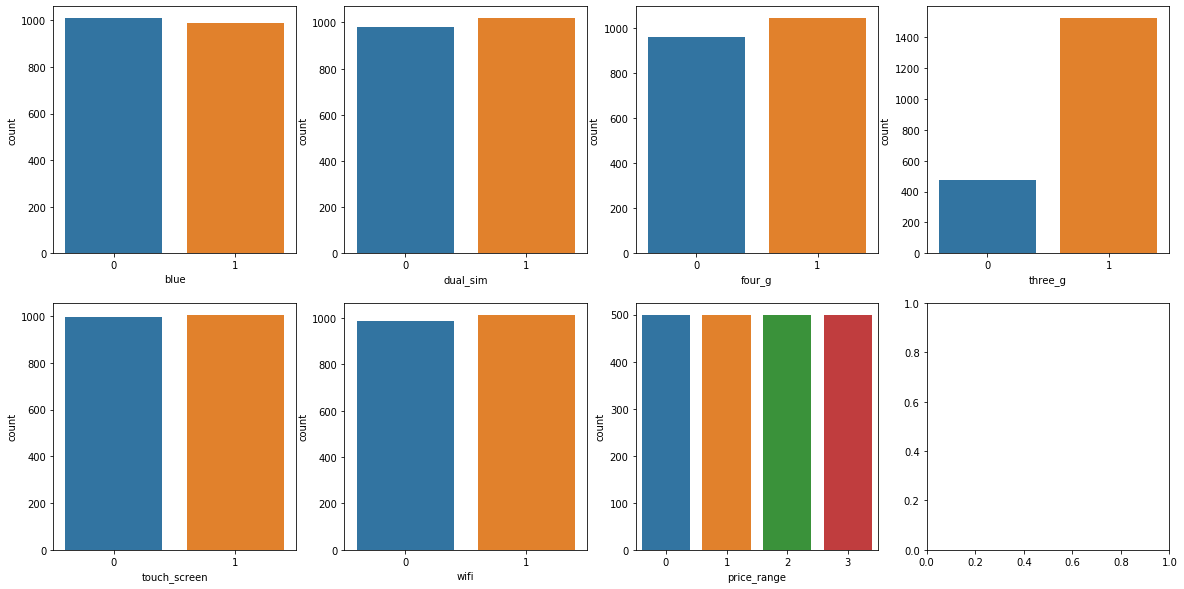

In [7]:
fig, ax = plt.subplots(2,4,figsize=(20,10))
for i, j in zip(categ_col,ax.flatten()):
    sns.countplot(df[i],ax=j)
plt.show()

In [8]:
numeric_col = ['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

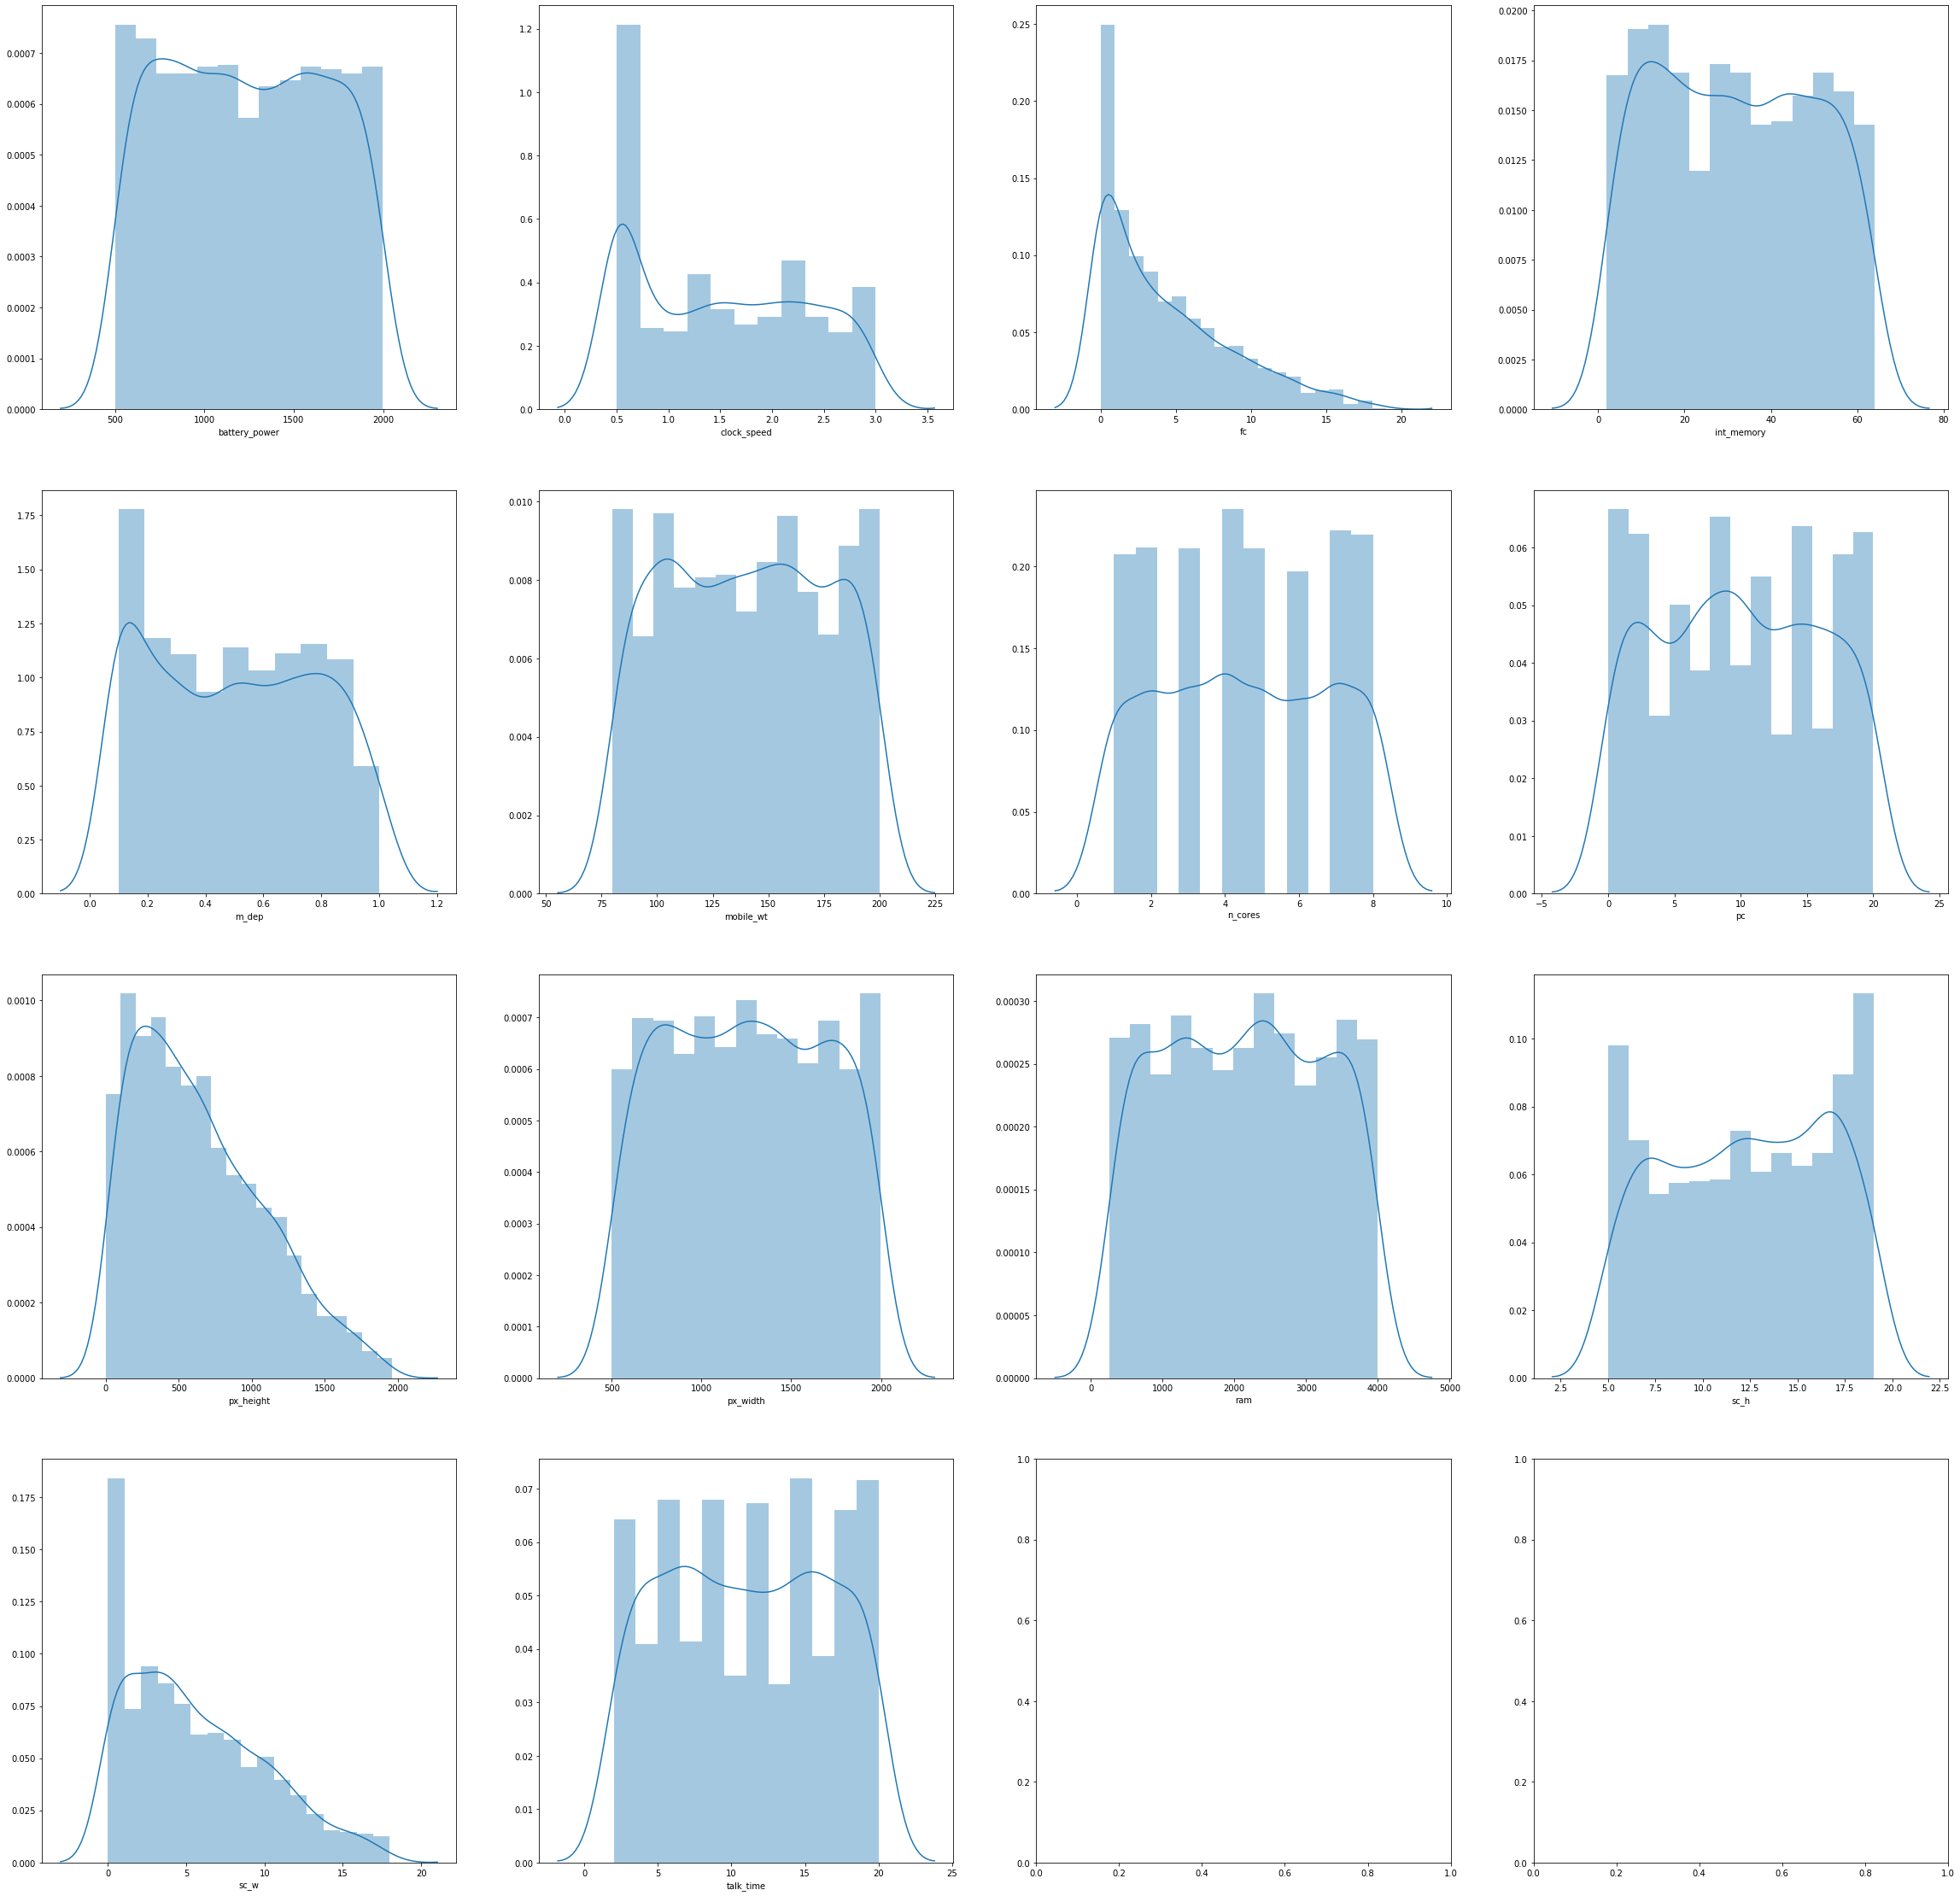

In [9]:
fig, ax = plt.subplots(4,4,figsize=(40,40))
for i, j in zip(numeric_col,ax.flatten()):
    sns.distplot(df[i],ax=j)
plt.show()

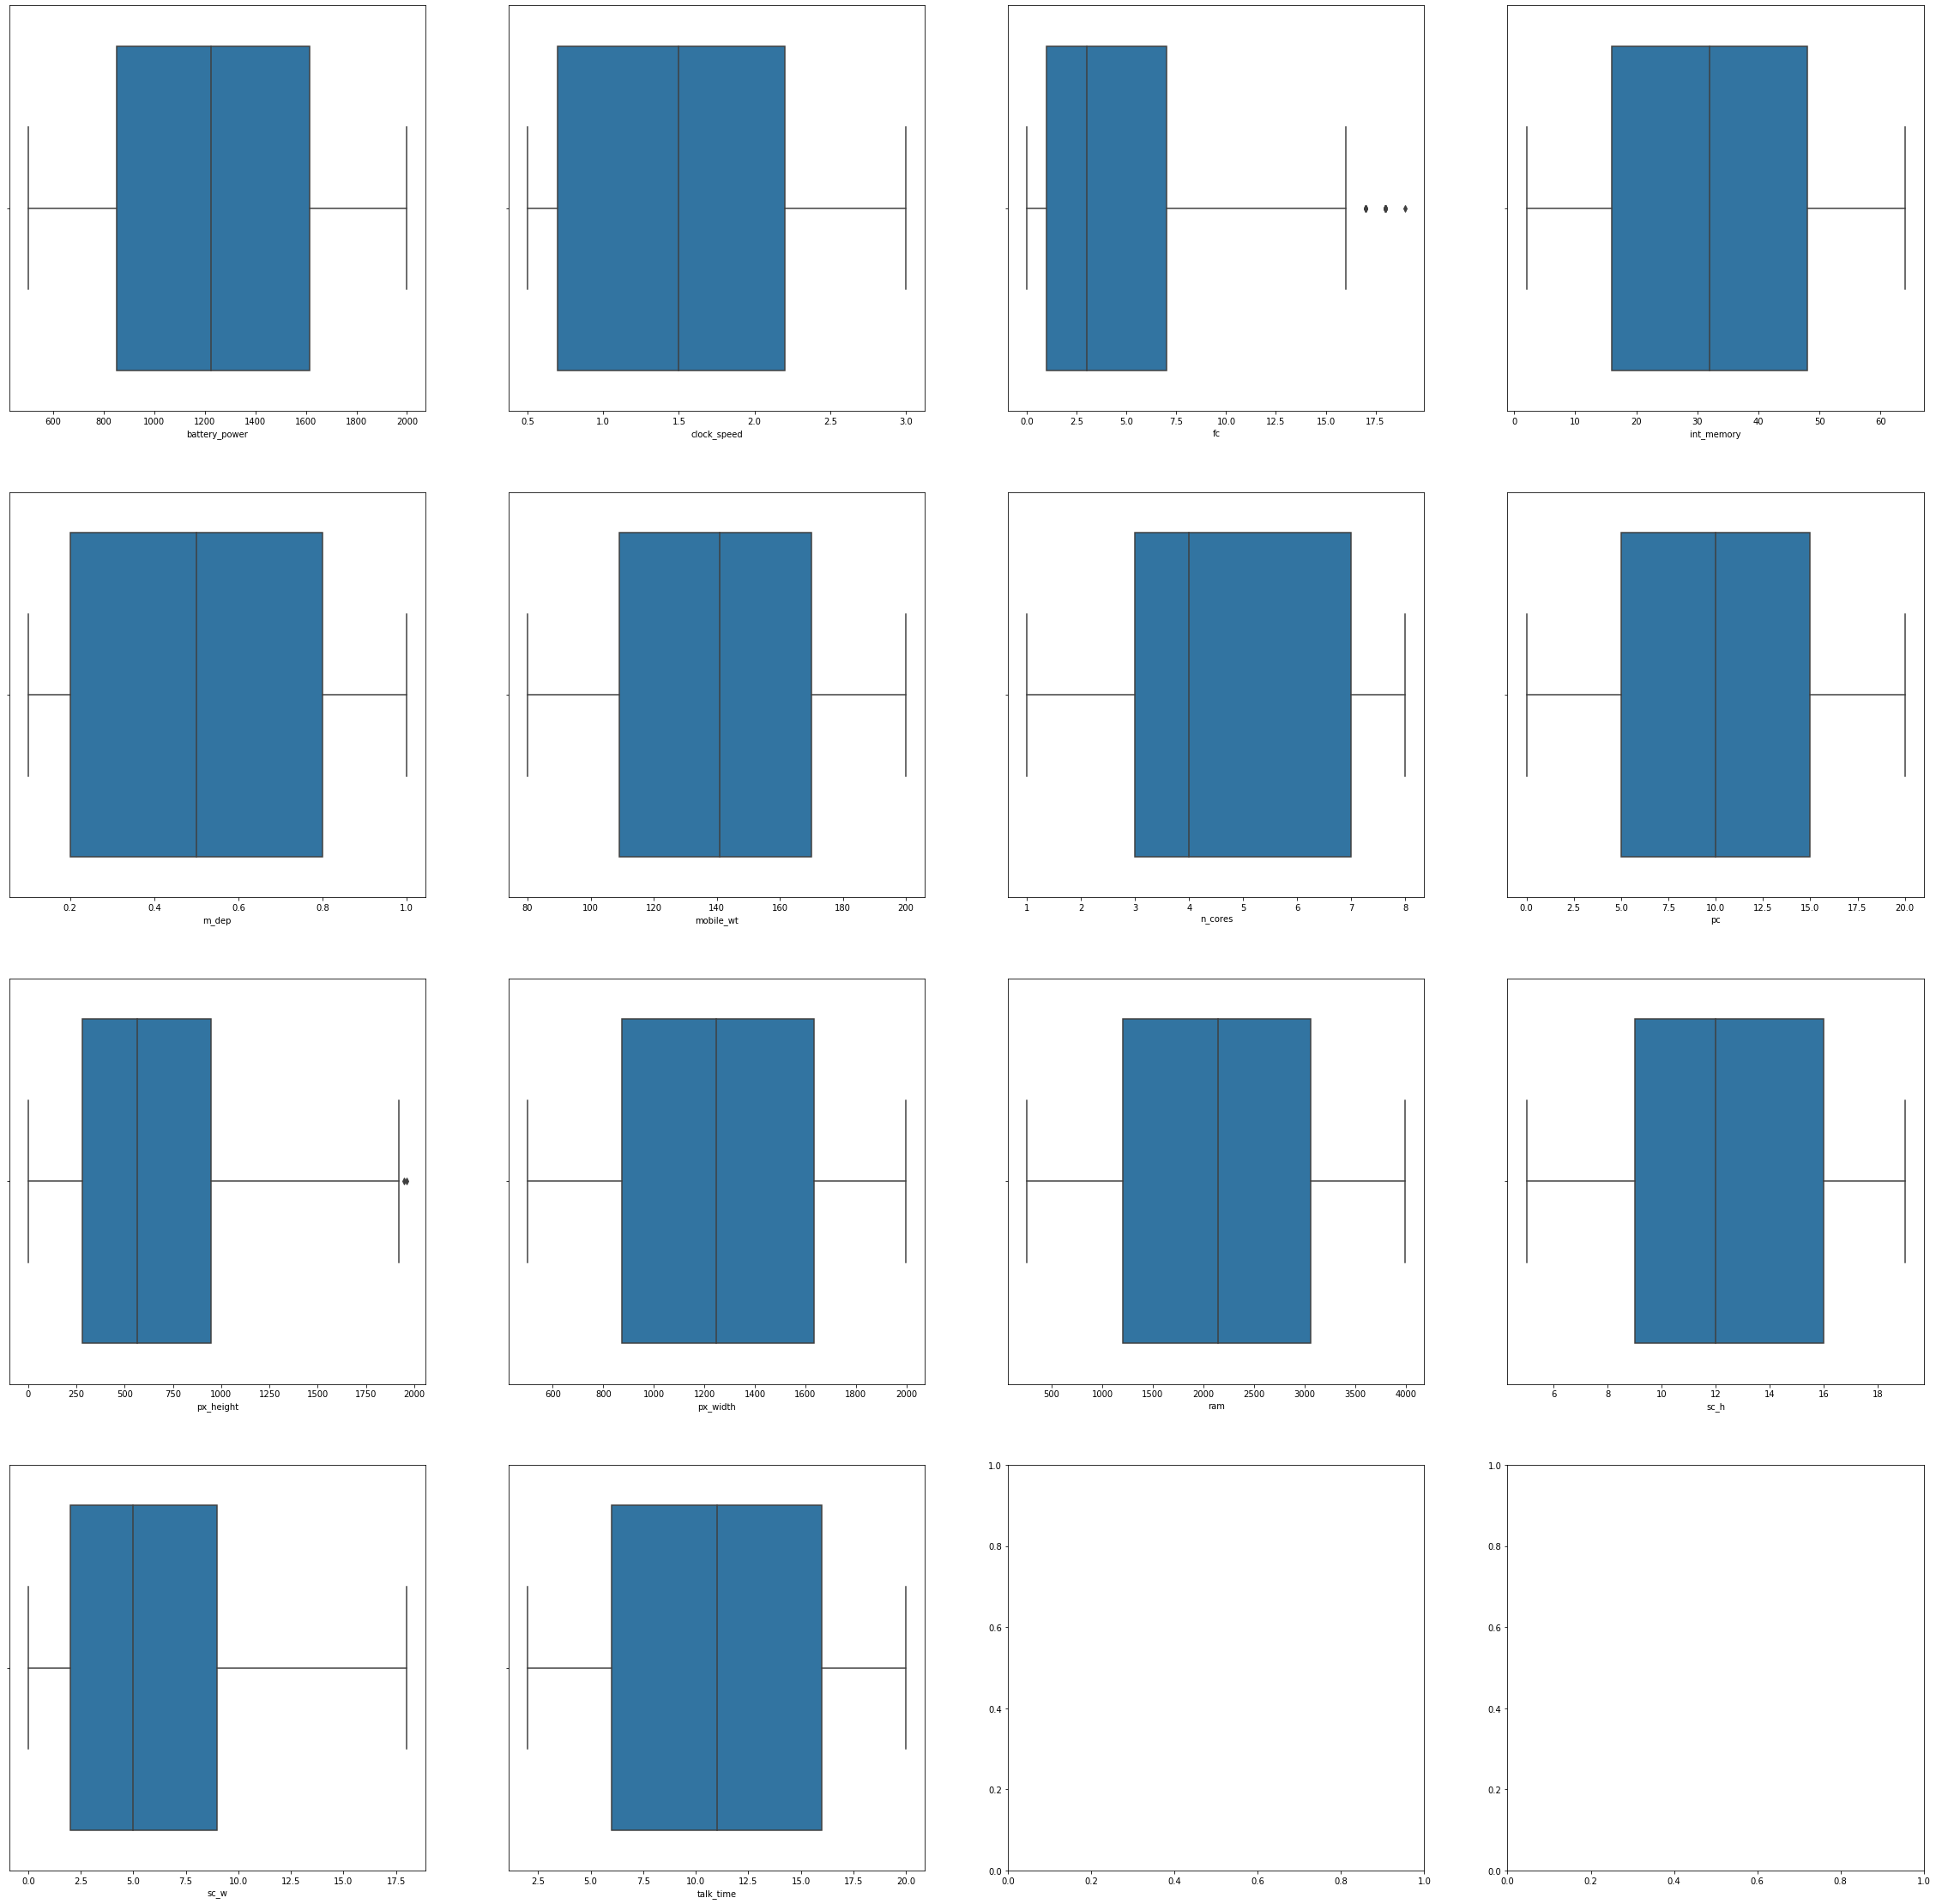

In [10]:
fig, ax = plt.subplots(4,4,figsize=(40,40))
for i, j in zip(numeric_col,ax.flatten()):
    sns.boxplot(df[i],ax=j)
plt.show()

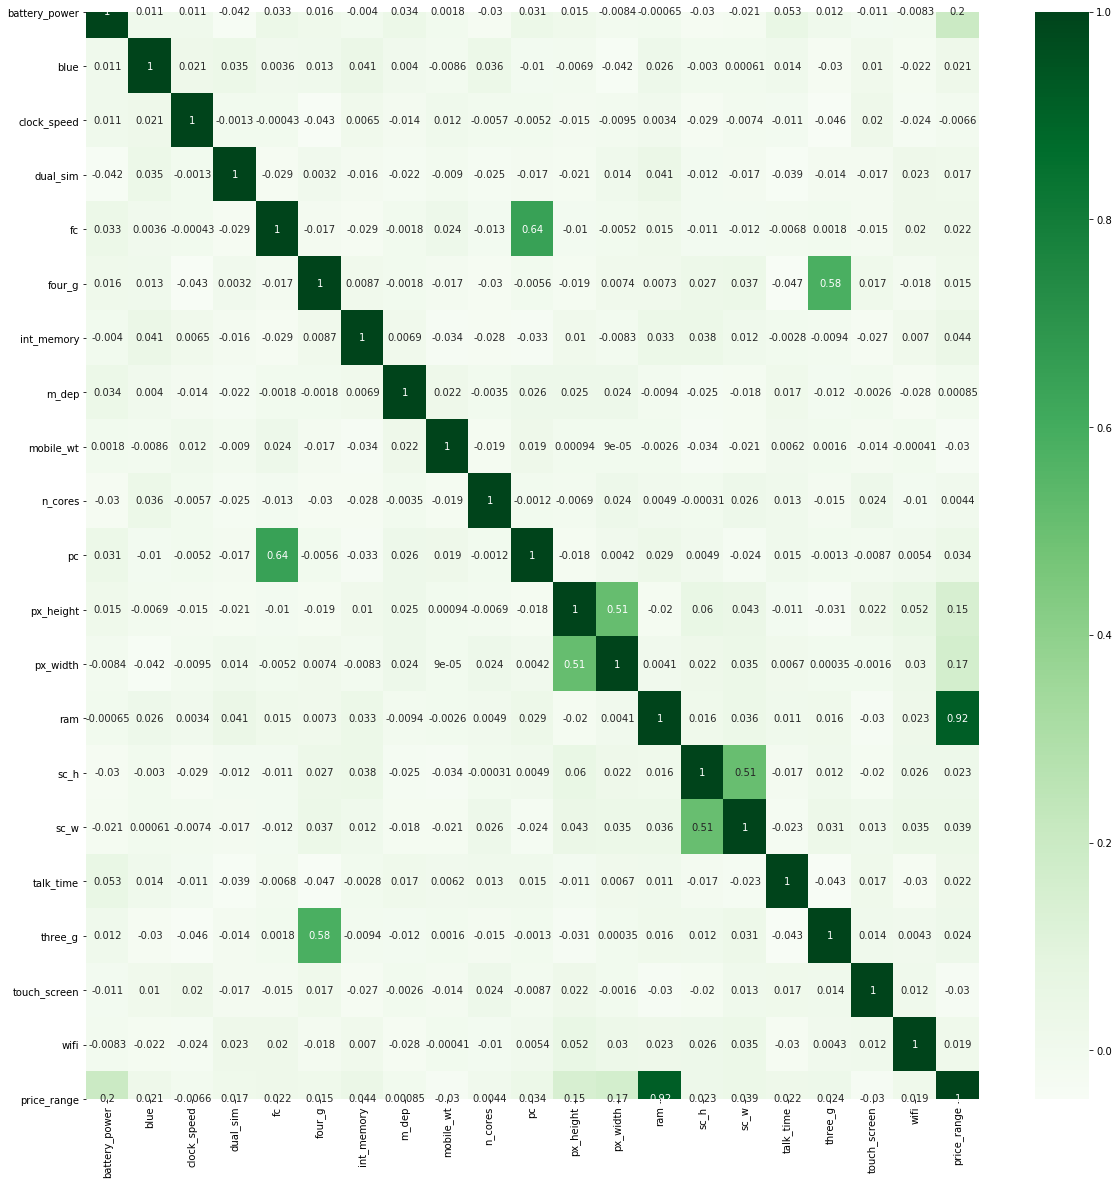

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

In [12]:
df_final = df.copy()

In [13]:
df_final['screen_size'] = np.sqrt((df['sc_h']^2)+(df['sc_w']^2))

In [14]:
df_final['PPI'] = np.sqrt((df['px_width']**2)+(df['px_height']**2))/df_final['screen_size']

In [15]:
for i in ['four_g','three_g']:
    df[i] = df[i].astype('str')

In [16]:
df2 = df['four_g']+df['three_g']

In [17]:
df1 = pd.get_dummies(df2,prefix='4g_3g')

In [18]:
df_final = pd.concat([df_final,df1],axis=1)

In [19]:
df_final.head().T

,0,1,2,3,4
battery_power,842.000000,1021.000000,563.000000,615.000000,1821.000000
blue,0.000000,1.000000,1.000000,1.000000,1.000000
clock_speed,2.200000,0.500000,0.500000,2.500000,1.200000
dual_sim,0.000000,1.000000,1.000000,0.000000,0.000000
fc,1.000000,0.000000,2.000000,0.000000,13.000000
four_g,0.000000,1.000000,1.000000,0.000000,1.000000
int_memory,7.000000,53.000000,41.000000,10.000000,44.000000
m_dep,0.600000,0.700000,0.900000,0.800000,0.600000
mobile_wt,188.000000,136.000000,145.000000,131.000000,141.000000
n_cores,2.000000,3.000000,5.000000,6.000000,2.000000


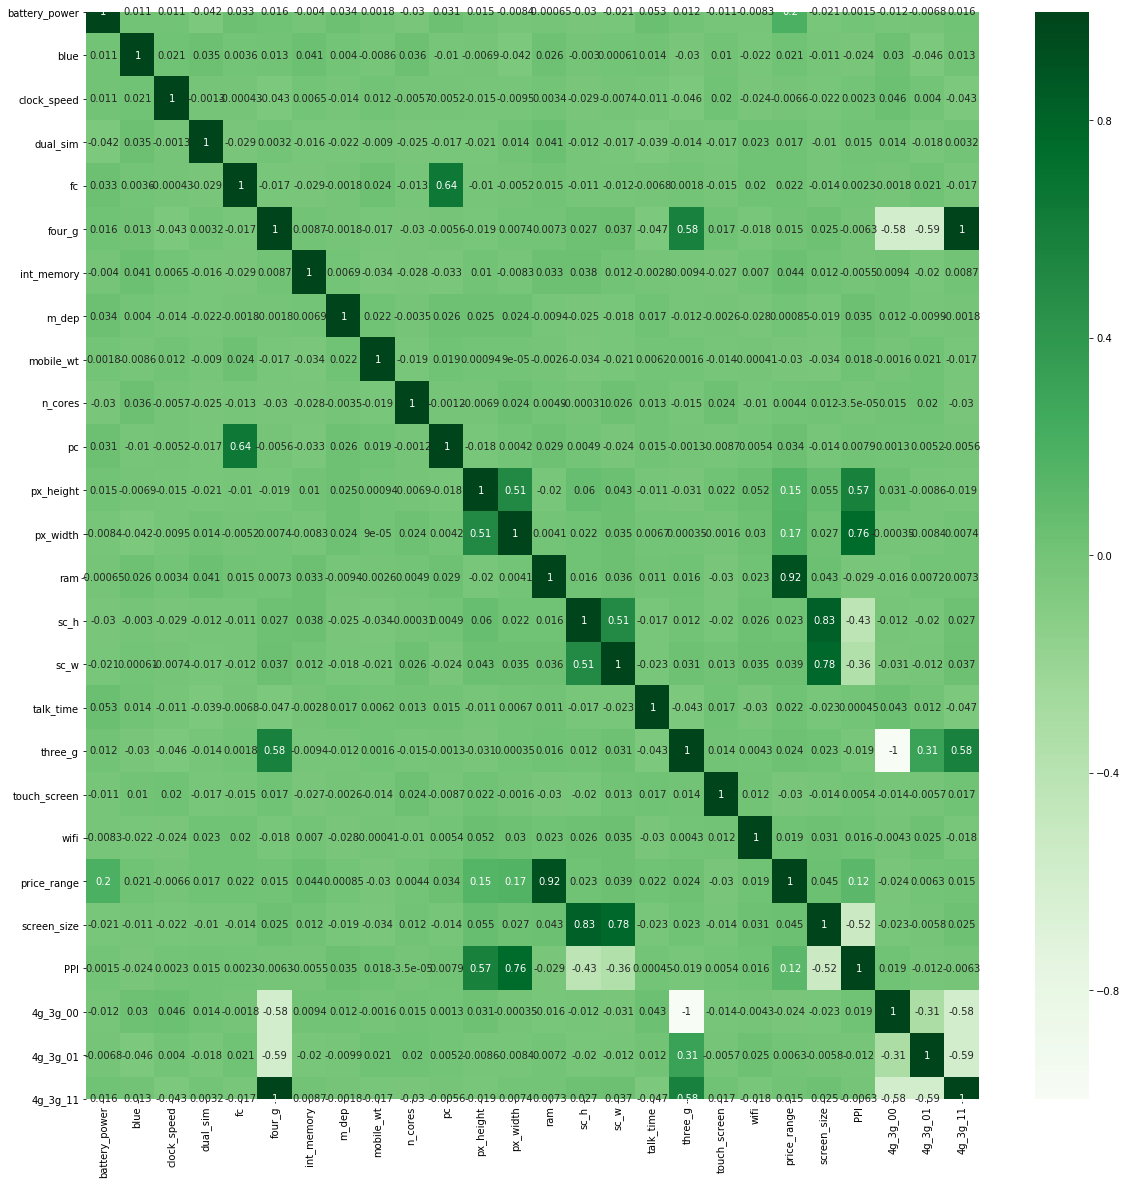

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df_final.corr(),annot=True,cmap='Greens')

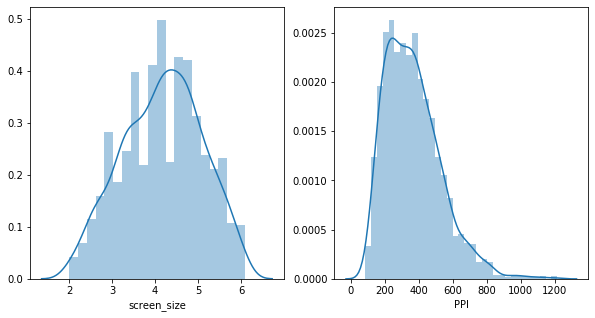

In [21]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
for i, j in zip(['screen_size','PPI'],ax.flatten()):
    sns.distplot(df_final[i],ax=j)
plt.show()

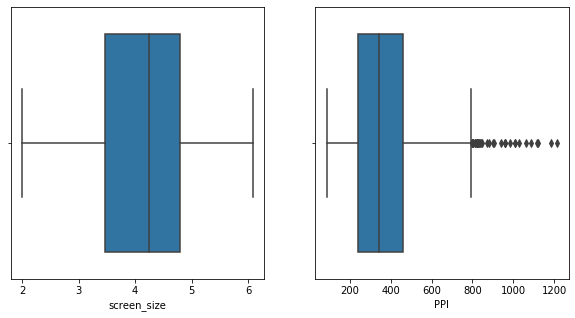

In [22]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
for i, j in zip(['screen_size','PPI'],ax.flatten()):
    sns.boxplot(df_final[i],ax=j)
plt.show()

In [23]:
# calculate the first quartile
Q1 = df_final.quantile(0.25)

#calculate the third quartile
Q3 = df_final.quantile(0.75)

# The Interquartile Range (IQR) is defined as difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1
print(IQR)

battery_power     763.500000
blue                1.000000
clock_speed         1.500000
dual_sim            1.000000
fc                  6.000000
four_g              1.000000
int_memory         32.000000
m_dep               0.600000
mobile_wt          61.000000
n_cores             4.000000
pc                 10.000000
px_height         664.500000
px_width          758.250000
ram              1857.000000
sc_h                7.000000
sc_w                7.000000
talk_time          10.000000
three_g             0.000000
touch_screen        1.000000
wifi                1.000000
price_range         1.500000
screen_size         1.331730
PPI               221.815751
4g_3g_00            0.000000
4g_3g_01            0.000000
4g_3g_11            1.000000
dtype: float64


In [24]:
df_outliers = df_final[((df_final < (Q1 - 1.5 * IQR)) | (df_final > (Q3 + 1.5 * IQR))).any(axis=1)]

In [25]:
df_outliers.shape

(988, 26)

In [26]:
X = df_final.drop('price_range',axis=1)
y = df_final['price_range']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

## Model Building

**Logistic Regression**

In [27]:
logreg = LogisticRegression()

In [28]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

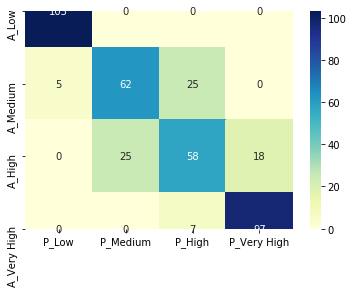

In [29]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [30]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       103
           1       0.71      0.67      0.69        92
           2       0.64      0.57      0.61       101
           3       0.84      0.93      0.89       104

    accuracy                           0.80       400
   macro avg       0.79      0.80      0.79       400
weighted avg       0.79      0.80      0.79       400



In [31]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

In [32]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [33]:
multiclass_roc_auc_score(y_test, y_pred)

0.8643780883409058

In [34]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','f1-score','Accuracy Score','Train Accuracy']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
Logistic_regression_metrics = pd.Series({'Model': "Logistic regression ",
                     'AUC Score' : multiclass_roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, y_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, y_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Train Accuracy': logreg.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Logistic_regression_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.864378,0.791513,0.8,0.794398,0.8,0.825


**Decision Tree**

In [35]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
decision_tree_classification = DecisionTreeClassifier(criterion='entropy')

# train model
decision_tree = decision_tree_classification.fit(X_train, y_train)

# predict the model using 'X_test'
decision_tree_pred = decision_tree.predict(X_test)

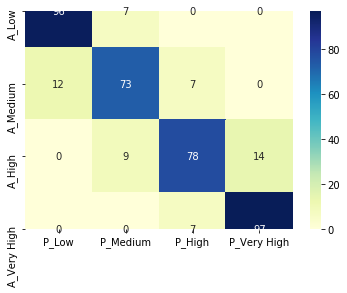

In [36]:
# compute the confusion matrix
cm = confusion_matrix(y_test, decision_tree_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [37]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,decision_tree_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       103
           1       0.82      0.79      0.81        92
           2       0.85      0.77      0.81       101
           3       0.87      0.93      0.90       104

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



In [38]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Decision_Tree_metrics = pd.Series({'Model': "Decision Tree",
                     'AUC Score' : multiclass_roc_auc_score(y_test, decision_tree_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, decision_tree_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_pred),
                 'Train Accuracy': decision_tree.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Decision_Tree_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.864378,0.791513,0.80,0.794398,0.80,0.825
1,Decision Tree,0.905502,0.858824,0.86,0.858536,0.86,1.000


**Decision Tree using Grid Search CV**

In [50]:
# 'criterion': The function to measure the quality of split
# 'max_depth': The maximum depth of the tree
# 'max_leaf_nodes': The maximum number of leaf nodes required
# 'min_samples_leaf': The minimum number of samples required to be at a leaf node
# 'min_samples_split': The minimum number of samples required to split an internal node

max_depth = np.arange(1,5,1)
min_samples_leaf = np.arange(1,50,10)
max_leaf_nodes = np.arange(10,20,1)

# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": max_depth,
              "min_samples_leaf":min_samples_leaf
              }

In [51]:
decision_tree_Gridsearch = DecisionTreeClassifier()
decision_tree_Gridsearch = GridSearchCV(decision_tree_Gridsearch, param_grid, cv=10)
decision_tree_Gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4]),
                 

In [52]:
decision_tree_Gridsearch.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 11}

In [53]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
decision_tree_classification = DecisionTreeClassifier(criterion='gini',
 max_depth=2,
 max_leaf_nodes=4,
 min_samples_leaf=10)

# train model
decision_tree_Grid = decision_tree_classification.fit(X_train, y_train)

# predict the model using 'X_test'
decision_tree_Grid_pred = decision_tree_Grid.predict(X_test)

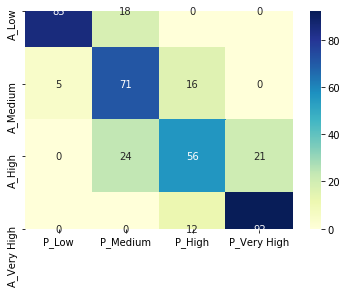

In [54]:
# compute the confusion matrix
cm = confusion_matrix(y_test, decision_tree_Grid_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [55]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,decision_tree_Grid_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       103
           1       0.63      0.77      0.69        92
           2       0.67      0.55      0.61       101
           3       0.81      0.88      0.85       104

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.77      0.76      0.76       400



In [56]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Decision_Tree_Grid_metrics = pd.Series({'Model': "Decision Tree with Grid Search",
                     'AUC Score' : multiclass_roc_auc_score(y_test, decision_tree_Grid_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_Grid_pred),
                 'Train Accuracy': decision_tree_Grid.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Decision_Tree_Grid_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.864378,0.791513,0.80,0.794398,0.80,0.825000
1,Decision Tree,0.905502,0.858824,0.86,0.858536,0.86,1.000000
2,Decision Tree with Grid Search,0.839783,0.767722,0.76,0.759456,0.76,0.764375


**Random Forest**

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
random_forest = RandomForestClassifier()

# train model
random_forest.fit(X_train, y_train)

# predict the model using 'X_test'
rf_pred = random_forest.predict(X_test)

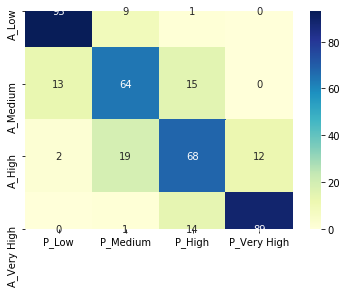

In [59]:
# compute the confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [60]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,rf_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       103
           1       0.69      0.70      0.69        92
           2       0.69      0.67      0.68       101
           3       0.88      0.86      0.87       104

    accuracy                           0.79       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.79      0.78       400



In [61]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "Random Forest",
                     'AUC Score' : multiclass_roc_auc_score(y_test, rf_pred),
                 'Precision Score': metrics.precision_score(y_test, rf_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, rf_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, rf_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, rf_pred),
                 'Train Accuracy': random_forest.score(X_train,y_train)})

# appending our result table
result_tabulation = result_tabulation.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.864378,0.791513,0.800,0.794398,0.800,0.825000
1,Decision Tree,0.905502,0.858824,0.860,0.858536,0.860,1.000000
2,Decision Tree with Grid Search,0.839783,0.767722,0.760,0.759456,0.760,0.764375
3,Random Forest,0.855258,0.784329,0.785,0.784445,0.785,0.995000


**KNN**

In [62]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [63]:
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

In [64]:
param_grid_knn = {'n_neighbors':np.arange(1,15,2), 'p':[1,2,3]}

In [65]:
# instantiate the KNN classifier
knn_Gridsearch = KNeighborsClassifier()

# use 'GridSearchCV' to obtain the best value of K
knn_Gridsearch_CV = GridSearchCV(knn_Gridsearch, param_grid_knn, cv=5)

# fit the model
knn_Gridsearch_CV.fit(X_train_scale,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13]),
                         'p': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [66]:
knn_Gridsearch_CV.best_params_

{'n_neighbors': 13, 'p': 1}

In [67]:
# as K = 7, is a best pick for K, build a KNN model with K = 7
knn = KNeighborsClassifier(n_neighbors=13,p=1)

#Fit the model
knn.fit(X_train_scale,y_train)

knn_pred = knn.predict(X_test_scale)

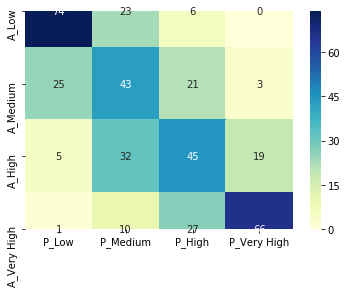

In [68]:
# compute the confusion matrix
cm = confusion_matrix(y_test, knn_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [69]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,knn_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       103
           1       0.40      0.47      0.43        92
           2       0.45      0.45      0.45       101
           3       0.75      0.63      0.69       104

    accuracy                           0.57       400
   macro avg       0.58      0.57      0.57       400
weighted avg       0.58      0.57      0.57       400



In [70]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
knn_metrics = pd.Series({'Model': "KNN",
                     'AUC Score' : multiclass_roc_auc_score(y_test, knn_pred),
                 'Precision Score': metrics.precision_score(y_test, knn_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, knn_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, knn_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, knn_pred),
                 'Train Accuracy': knn.score(X_train,y_train)})


# appending our result table
result_tabulation = result_tabulation.append(knn_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.864378,0.791513,0.800,0.794398,0.800,0.825000
1,Decision Tree,0.905502,0.858824,0.860,0.858536,0.860,1.000000
2,Decision Tree with Grid Search,0.839783,0.767722,0.760,0.759456,0.760,0.764375
3,Random Forest,0.855258,0.784329,0.785,0.784445,0.785,0.995000
4,KNN,0.711957,0.582823,0.570,0.574496,0.570,0.245625


**Feature Selection**

Text(0.5, 1.0, 'Visualizing Important Features')

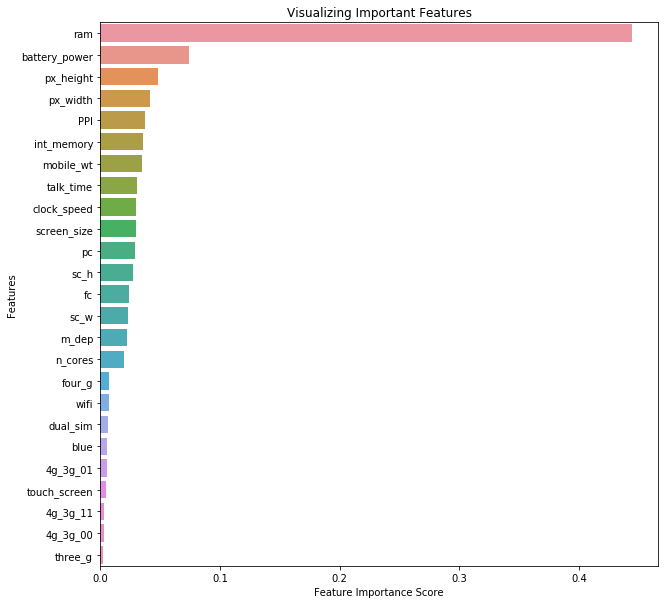

In [71]:
feature_imp = pd.Series(random_forest.feature_importances_,index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

In [76]:
rf_f = feature_imp[feature_imp>0.030].index.tolist()
rf_f

['ram',
 'battery_power',
 'px_height',
 'px_width',
 'PPI',
 'int_memory',
 'mobile_wt',
 'talk_time']

In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

sel_chi2 = SelectKBest(chi2, k=8)    # select 4 features
X_train_chi2 = sel_chi2.fit_transform(X_train, y_train)
print(sel_chi2.get_support())

[ True False False False  True False  True False  True False False  True
  True  True False False False False False False False  True False False
 False]


In [78]:
temp = pd.Series(sel_chi2.get_support(),index = X.columns)
selected_features_kbest = temp[temp==True].index
kbest_f = selected_features_kbest.tolist()
print(selected_features_kbest)

Index(['battery_power', 'fc', 'int_memory', 'mobile_wt', 'px_height',
       'px_width', 'ram', 'PPI'],
      dtype='object')


In [79]:
d = {'random forest': sorted(rf_f), 'kbest': sorted(kbest_f)}
feat_sel = pd.DataFrame(d)
feat_sel

,random forest,kbest
0,PPI,PPI
1,battery_power,battery_power
2,int_memory,fc
3,mobile_wt,int_memory
4,px_height,mobile_wt
5,px_width,px_height
6,ram,px_width
7,talk_time,ram


In [80]:
df_feat = df_final[rf_f]

In [81]:
df_feat.shape

(2000, 8)

In [82]:
X = df_feat
y = df_final['price_range']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

## Model Building

**Logistic Regression**

In [83]:
logreg = LogisticRegression()

In [84]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

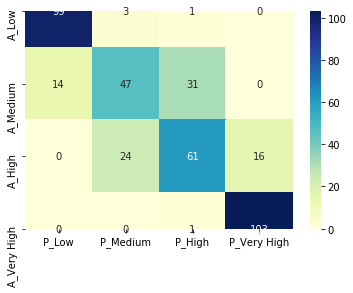

In [85]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [86]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       103
           1       0.64      0.51      0.57        92
           2       0.65      0.60      0.63       101
           3       0.87      0.99      0.92       104

    accuracy                           0.78       400
   macro avg       0.76      0.77      0.76       400
weighted avg       0.76      0.78      0.76       400



In [87]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Logistic_regression_metrics = pd.Series({'Model': "Logistic regression with feature selection",
                     'AUC Score' : multiclass_roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, y_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, y_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Train Accuracy': logreg.score(X_train,y_train)})

# appending our result table
result_tabulation = result_tabulation.append(Logistic_regression_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.864378,0.791513,0.800,0.794398,0.800,0.825000
1,Decision Tree,0.905502,0.858824,0.860,0.858536,0.860,1.000000
2,Decision Tree with Grid Search,0.839783,0.767722,0.760,0.759456,0.760,0.764375
3,Random Forest,0.855258,0.784329,0.785,0.784445,0.785,0.995000
4,KNN,0.711957,0.582823,0.570,0.574496,0.570,0.245625
5,Logistic regression with feature selection,0.845895,0.760577,0.775,0.764436,0.775,0.756875


**Decision Tree**

In [88]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
decision_tree_classification = DecisionTreeClassifier(criterion='entropy')

# train model
decision_tree = decision_tree_classification.fit(X_train, y_train)

# predict the model using 'X_test'
decision_tree_pred = decision_tree.predict(X_test)

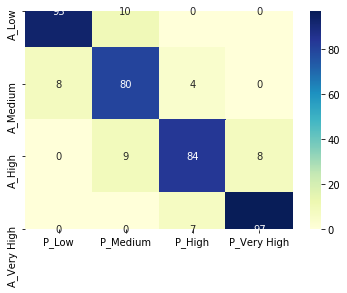

In [89]:
# compute the confusion matrix
cm = confusion_matrix(y_test, decision_tree_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [90]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,decision_tree_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       103
           1       0.81      0.87      0.84        92
           2       0.88      0.83      0.86       101
           3       0.92      0.93      0.93       104

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



In [91]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Decision_Tree_metrics = pd.Series({'Model': "Decision Tree with feature selection",
                     'AUC Score' : multiclass_roc_auc_score(y_test, decision_tree_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, decision_tree_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_pred),
                 'Train Accuracy': decision_tree.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Decision_Tree_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.864378,0.791513,0.800,0.794398,0.800,0.825000
1,Decision Tree,0.905502,0.858824,0.860,0.858536,0.860,1.000000
2,Decision Tree with Grid Search,0.839783,0.767722,0.760,0.759456,0.760,0.764375
3,Random Forest,0.855258,0.784329,0.785,0.784445,0.785,0.995000
4,KNN,0.711957,0.582823,0.570,0.574496,0.570,0.245625
5,Logistic regression with feature selection,0.845895,0.760577,0.775,0.764436,0.775,0.756875
6,Decision Tree with feature selection,0.923052,0.886416,0.885,0.885218,0.885,1.000000


**Decision Tree using Grid Search CV**

In [94]:
# 'criterion': The function to measure the quality of split
# 'max_depth': The maximum depth of the tree
# 'max_leaf_nodes': The maximum number of leaf nodes required
# 'min_samples_leaf': The minimum number of samples required to be at a leaf node
# 'min_samples_split': The minimum number of samples required to split an internal node

max_depth = np.arange(1,5,1)
min_samples_leaf = np.arange(1,50,10)
max_leaf_nodes = np.arange(10,20,1)

# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": max_depth,
              "min_samples_leaf":min_samples_leaf
              }

In [95]:
decision_tree_Gridsearch = DecisionTreeClassifier()
decision_tree_Gridsearch = GridSearchCV(decision_tree_Gridsearch, param_grid, cv=10)
decision_tree_Gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4]),
                 

In [96]:
decision_tree_Gridsearch.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 11}

In [97]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
decision_tree_classification = DecisionTreeClassifier(criterion='gini',
 max_depth=4,
 max_leaf_nodes=15,
 min_samples_leaf=10)

# train model
decision_tree_Grid = decision_tree_classification.fit(X_train, y_train)

# predict the model using 'X_test'
decision_tree_Grid_pred = decision_tree_Grid.predict(X_test)

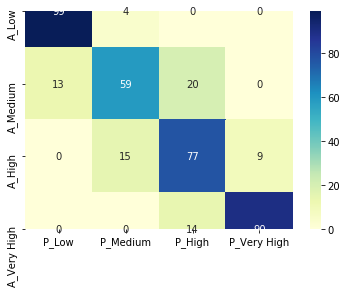

In [98]:
# compute the confusion matrix
cm = confusion_matrix(y_test, decision_tree_Grid_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [99]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,decision_tree_Grid_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       103
           1       0.76      0.64      0.69        92
           2       0.69      0.76      0.73       101
           3       0.91      0.87      0.89       104

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



In [100]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Decision_Tree_Grid_metrics = pd.Series({'Model': "Decision Tree with Grid Search",
                     'AUC Score' : multiclass_roc_auc_score(y_test, decision_tree_Grid_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_Grid_pred),
                 'Train Accuracy': decision_tree_Grid.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Decision_Tree_Grid_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.864378,0.791513,0.8000,0.794398,0.8000,0.825000
1,Decision Tree,0.905502,0.858824,0.8600,0.858536,0.8600,1.000000
2,Decision Tree with Grid Search,0.839783,0.767722,0.7600,0.759456,0.7600,0.764375
3,Random Forest,0.855258,0.784329,0.7850,0.784445,0.7850,0.995000
4,KNN,0.711957,0.582823,0.5700,0.574496,0.5700,0.245625
5,Logistic regression with feature selection,0.845895,0.760577,0.7750,0.764436,0.7750,0.756875
6,Decision Tree with feature selection,0.923052,0.886416,0.8850,0.885218,0.8850,1.000000
7,Decision Tree with Grid Search,0.872582,0.813107,0.8125,0.810748,0.8125,0.840625


**Random Forest**

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
random_forest = RandomForestClassifier()

# train model
random_forest.fit(X_train, y_train)

# predict the model using 'X_test'
rf_pred = random_forest.predict(X_test)

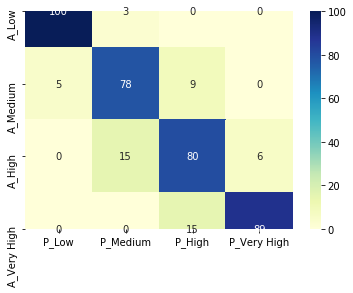

In [103]:
# compute the confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [104]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,rf_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       103
           1       0.81      0.85      0.83        92
           2       0.77      0.79      0.78       101
           3       0.94      0.86      0.89       104

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [105]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "Random Forest with selected features",
                     'AUC Score' : multiclass_roc_auc_score(y_test, rf_pred),
                 'Precision Score': metrics.precision_score(y_test, rf_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, rf_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, rf_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, rf_pred),
                 'Train Accuracy': random_forest.score(X_train,y_train)})

# appending our result table
result_tabulation = result_tabulation.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.864378,0.791513,0.8000,0.794398,0.8000,0.825000
1,Decision Tree,0.905502,0.858824,0.8600,0.858536,0.8600,1.000000
2,Decision Tree with Grid Search,0.839783,0.767722,0.7600,0.759456,0.7600,0.764375
3,Random Forest,0.855258,0.784329,0.7850,0.784445,0.7850,0.995000
4,KNN,0.711957,0.582823,0.5700,0.574496,0.5700,0.245625
5,Logistic regression with feature selection,0.845895,0.760577,0.7750,0.764436,0.7750,0.756875
6,Decision Tree with feature selection,0.923052,0.886416,0.8850,0.885218,0.8850,1.000000
7,Decision Tree with Grid Search,0.872582,0.813107,0.8125,0.810748,0.8125,0.840625
8,Random Forest with selected features,0.911342,0.869923,0.8675,0.868083,0.8675,0.996875


**Random Forest**

In [108]:
max_depth = np.arange(1,5,1)
min_samples_leaf = np.arange(1,50,10)
max_leaf_nodes = np.arange(10,18,1)
n_estima = np.arange(100,200,25)

param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": max_depth,
              "min_samples_leaf":min_samples_leaf,
              "max_leaf_nodes": max_leaf_nodes,
              "n_estimators":n_estima}

In [109]:
random_forest_Gridsearch = RandomForestClassifier()
random_forest_Gridsearch = GridSearchCV(random_forest_Gridsearch, param_grid, cv=5)
random_forest_Gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [110]:
random_forest_Gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 12,
 'min_samples_leaf': 11,
 'n_estimators': 125}

In [111]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
random_forest = RandomForestClassifier(criterion= 'gini',
                                       max_depth=4,max_leaf_nodes=15,min_samples_leaf=20,n_estimators=125)

# train model
random_forest.fit(X_train, y_train)

# predict the model using 'X_test'
rf_pred = random_forest.predict(X_test)

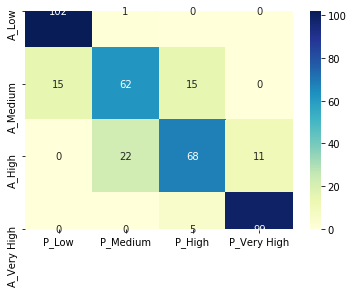

In [112]:
# compute the confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [113]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,rf_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       103
           1       0.73      0.67      0.70        92
           2       0.77      0.67      0.72       101
           3       0.90      0.95      0.93       104

    accuracy                           0.83       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.83      0.82       400



In [114]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "Random Forest with selected features and Grid Search",
                     'AUC Score' : multiclass_roc_auc_score(y_test, rf_pred),
                 'Precision Score': metrics.precision_score(y_test, rf_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, rf_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, rf_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, rf_pred),
                 'Train Accuracy': random_forest.score(X_train,y_train)})

# appending our result table
result_tabulation = result_tabulation.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.864378,0.791513,0.8000,0.794398,0.8000,0.825000
1,Decision Tree,0.905502,0.858824,0.8600,0.858536,0.8600,1.000000
2,Decision Tree with Grid Search,0.839783,0.767722,0.7600,0.759456,0.7600,0.764375
3,Random Forest,0.855258,0.784329,0.7850,0.784445,0.7850,0.995000
4,KNN,0.711957,0.582823,0.5700,0.574496,0.5700,0.245625
5,Logistic regression with feature selection,0.845895,0.760577,0.7750,0.764436,0.7750,0.756875
6,Decision Tree with feature selection,0.923052,0.886416,0.8850,0.885218,0.8850,1.000000
7,Decision Tree with Grid Search,0.872582,0.813107,0.8125,0.810748,0.8125,0.840625
8,Random Forest with selected features,0.911342,0.869923,0.8675,0.868083,0.8675,0.996875
9,Random Forest with selected features and Grid ...,0.882520,0.821366,0.8275,0.822157,0.8275,0.865000


**Ada Boost**

In [115]:
from sklearn.ensemble import AdaBoostClassifier

In [116]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
adaboost = AdaBoostClassifier()

# train model
adaboost.fit(X_train, y_train)

# predict the model using 'X_test'
ada_pred = adaboost.predict(X_test)

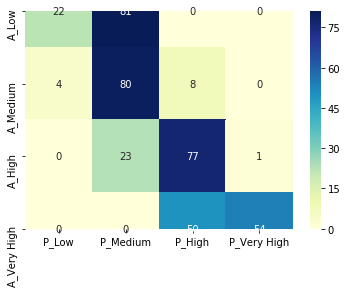

In [117]:
# compute the confusion matrix
cm = confusion_matrix(y_test, ada_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [118]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,ada_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.85      0.21      0.34       103
           1       0.43      0.87      0.58        92
           2       0.57      0.76      0.65       101
           3       0.98      0.52      0.68       104

    accuracy                           0.58       400
   macro avg       0.71      0.59      0.56       400
weighted avg       0.72      0.58      0.56       400



In [119]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "Ada Boost with selected features",
                     'AUC Score' : multiclass_roc_auc_score(y_test, ada_pred),
                 'Precision Score': metrics.precision_score(y_test, ada_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, ada_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, ada_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, ada_pred),
                 'Train Accuracy': adaboost.score(X_train,y_train)})

# appending our result table
result_tabulation = result_tabulation.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.864378,0.791513,0.8000,0.794398,0.8000,0.825000
1,Decision Tree,0.905502,0.858824,0.8600,0.858536,0.8600,1.000000
2,Decision Tree with Grid Search,0.839783,0.767722,0.7600,0.759456,0.7600,0.764375
3,Random Forest,0.855258,0.784329,0.7850,0.784445,0.7850,0.995000
4,KNN,0.711957,0.582823,0.5700,0.574496,0.5700,0.245625
5,Logistic regression with feature selection,0.845895,0.760577,0.7750,0.764436,0.7750,0.756875
6,Decision Tree with feature selection,0.923052,0.886416,0.8850,0.885218,0.8850,1.000000
7,Decision Tree with Grid Search,0.872582,0.813107,0.8125,0.810748,0.8125,0.840625
8,Random Forest with selected features,0.911342,0.869923,0.8675,0.868083,0.8675,0.996875
9,Random Forest with selected features and Grid ...,0.882520,0.821366,0.8275,0.822157,0.8275,0.865000


**XG Boost**

In [120]:
from xgboost import XGBClassifier

In [121]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
xgboost = XGBClassifier()

# train model
xgboost.fit(X_train, y_train)

# predict the model using 'X_test'
xg_pred = xgboost.predict(X_test)

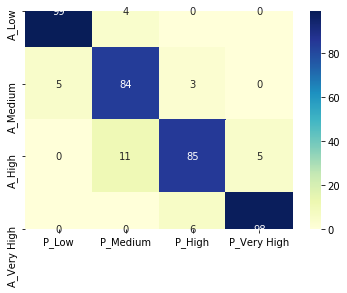

In [122]:
# compute the confusion matrix
cm = confusion_matrix(y_test, xg_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [123]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,xg_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       103
           1       0.85      0.91      0.88        92
           2       0.90      0.84      0.87       101
           3       0.95      0.94      0.95       104

    accuracy                           0.92       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.92      0.92      0.91       400



In [124]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "XG Boost with selected features",
                     'AUC Score' : multiclass_roc_auc_score(y_test, xg_pred),
                 'Precision Score': metrics.precision_score(y_test, xg_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, xg_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, xg_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, xg_pred),
                 'Train Accuracy': xgboost.score(X_train,y_train)})

# appending our result table
result_tabulation = result_tabulation.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.864378,0.791513,0.8000,0.794398,0.8000,0.825000
1,Decision Tree,0.905502,0.858824,0.8600,0.858536,0.8600,1.000000
2,Decision Tree with Grid Search,0.839783,0.767722,0.7600,0.759456,0.7600,0.764375
3,Random Forest,0.855258,0.784329,0.7850,0.784445,0.7850,0.995000
4,KNN,0.711957,0.582823,0.5700,0.574496,0.5700,0.245625
5,Logistic regression with feature selection,0.845895,0.760577,0.7750,0.764436,0.7750,0.756875
6,Decision Tree with feature selection,0.923052,0.886416,0.8850,0.885218,0.8850,1.000000
7,Decision Tree with Grid Search,0.872582,0.813107,0.8125,0.810748,0.8125,0.840625
8,Random Forest with selected features,0.911342,0.869923,0.8675,0.868083,0.8675,0.996875
9,Random Forest with selected features and Grid ...,0.882520,0.821366,0.8275,0.822157,0.8275,0.865000


In [125]:
max_depth = [3,5,7,9,10]
n_estima = np.arange(1,100,20)
learn = [0.05,0.1,0.15,0.2,0.25,0.3]
colsample = [0.3,0.4,0.5,0.7]

param_grid =  {"max_depth": max_depth,
              "n_estimators":n_estima,
              'learning_rate':learn,
              'colsample_bytree':colsample}

In [126]:
xgboost_Gridsearch = XGBClassifier()
xgboost_Gridsearch = GridSearchCV(xgboost_Gridsearch, param_grid, cv=5)
xgboost_Gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                       

In [127]:
xgboost_Gridsearch.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 5,
 'n_estimators': 81}

In [128]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
xgboost = XGBClassifier(colsample_bytree= 0.7,
 learning_rate=0.25,
 max_depth=3,
 n_estimators=100)

# train model
xgboost.fit(X_train, y_train)

# predict the model using 'X_test'
xg_pred = xgboost.predict(X_test)

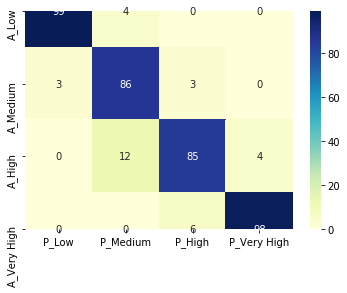

In [129]:
# compute the confusion matrix
cm = confusion_matrix(y_test, xg_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [130]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,xg_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       103
           1       0.84      0.93      0.89        92
           2       0.90      0.84      0.87       101
           3       0.96      0.94      0.95       104

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [131]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "XG Boost with selected features and Grid Search",
                     'AUC Score' : multiclass_roc_auc_score(y_test, xg_pred),
                 'Precision Score': metrics.precision_score(y_test, xg_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, xg_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, xg_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, xg_pred),
                 'Train Accuracy': xgboost.score(X_train,y_train)})

# appending our result table
result_tabulation = result_tabulation.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.864378,0.791513,0.8000,0.794398,0.8000,0.825000
1,Decision Tree,0.905502,0.858824,0.8600,0.858536,0.8600,1.000000
2,Decision Tree with Grid Search,0.839783,0.767722,0.7600,0.759456,0.7600,0.764375
3,Random Forest,0.855258,0.784329,0.7850,0.784445,0.7850,0.995000
4,KNN,0.711957,0.582823,0.5700,0.574496,0.5700,0.245625
5,Logistic regression with feature selection,0.845895,0.760577,0.7750,0.764436,0.7750,0.756875
6,Decision Tree with feature selection,0.923052,0.886416,0.8850,0.885218,0.8850,1.000000
7,Decision Tree with Grid Search,0.872582,0.813107,0.8125,0.810748,0.8125,0.840625
8,Random Forest with selected features,0.911342,0.869923,0.8675,0.868083,0.8675,0.996875
9,Random Forest with selected features and Grid ...,0.882520,0.821366,0.8275,0.822157,0.8275,0.865000


In [132]:
from vecstack import stacking

In [133]:
model = [DecisionTreeClassifier(criterion='gini',
         max_depth=4,
         max_leaf_nodes=15,
         min_samples_leaf=10),
        RandomForestClassifier(criterion= 'gini',
         max_depth=4,
         max_leaf_nodes=15,
         min_samples_leaf=20,
         n_estimators=125),
         XGBClassifier(colsample_bytree= 0.7,
 learning_rate=0.25,
 max_depth=3,
 n_estimators=100)]

In [134]:
S_train, S_test = stacking(model,
                           X_train, y_train, X_test,
                           
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,
                           
                           random_state=10)

In [135]:
model=XGBClassifier(random_state=10, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)

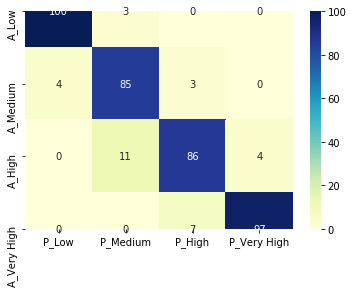

In [136]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [137]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       103
           1       0.86      0.92      0.89        92
           2       0.90      0.85      0.87       101
           3       0.96      0.93      0.95       104

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [138]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "Stacking with selected features",
                     'AUC Score' : multiclass_roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, y_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, y_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Train Accuracy': model.score(S_train,y_train)})

# appending our result table
result_tabulation = result_tabulation.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.864378,0.791513,0.8000,0.794398,0.8000,0.825000
1,Decision Tree,0.905502,0.858824,0.8600,0.858536,0.8600,1.000000
2,Decision Tree with Grid Search,0.839783,0.767722,0.7600,0.759456,0.7600,0.764375
3,Random Forest,0.855258,0.784329,0.7850,0.784445,0.7850,0.995000
4,KNN,0.711957,0.582823,0.5700,0.574496,0.5700,0.245625
5,Logistic regression with feature selection,0.845895,0.760577,0.7750,0.764436,0.7750,0.756875
6,Decision Tree with feature selection,0.923052,0.886416,0.8850,0.885218,0.8850,1.000000
7,Decision Tree with Grid Search,0.872582,0.813107,0.8125,0.810748,0.8125,0.840625
8,Random Forest with selected features,0.911342,0.869923,0.8675,0.868083,0.8675,0.996875
9,Random Forest with selected features and Grid ...,0.882520,0.821366,0.8275,0.822157,0.8275,0.865000


In [139]:
result_tabulation1 = result_tabulation.copy()

In [140]:
result_tabulation1.drop(['Precision Score','Recall Score'],axis=1,inplace=True)

In [141]:
result_tabulation1.rename(columns={'Accuracy Score':'Test Accuracy'},inplace=True)

In [142]:
result_tabulation1.columns

Index(['Model', 'AUC Score', 'f1-score', 'Test Accuracy', 'Train Accuracy'], dtype='object')

In [143]:
res = result_tabulation1.reindex(columns=['Model', 'AUC Score', 'f1-score', 'Train Accuracy', 'Test Accuracy'])

In [144]:
res[0:6]

,Model,AUC Score,f1-score,Train Accuracy,Test Accuracy
0,Logistic regression,0.864378,0.794398,0.825000,0.800
1,Decision Tree,0.905502,0.858536,1.000000,0.860
2,Decision Tree with Grid Search,0.839783,0.759456,0.764375,0.760
3,Random Forest,0.855258,0.784445,0.995000,0.785
4,KNN,0.711957,0.574496,0.245625,0.570
5,Logistic regression with feature selection,0.845895,0.764436,0.756875,0.775


In [145]:
res.iloc[[7],[0]] = 'Decision Tree with Feature selection and Grid Search'

In [146]:
res[6:]

,Model,AUC Score,f1-score,Train Accuracy,Test Accuracy
6,Decision Tree with feature selection,0.923052,0.885218,1.000000,0.8850
7,Decision Tree with Feature selection and Grid ...,0.872582,0.810748,0.840625,0.8125
8,Random Forest with selected features,0.911342,0.868083,0.996875,0.8675
9,Random Forest with selected features and Grid ...,0.882520,0.822157,0.865000,0.8275
10,Ada Boost with selected features,0.727034,0.562534,0.632500,0.5825
11,XG Boost with selected features,0.943196,0.914920,0.984375,0.9150
12,XG Boost with selected features and Grid Search,0.946772,0.920132,0.999375,0.9200
13,Stacking with selected features,0.946635,0.920010,0.895625,0.9200
